In [31]:
# imports
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

import string
import os

In [32]:
# installs
# !pip install numpy matplotlib pandas missingno

# readIn

In [36]:
datapath = './data'
fileName = 'agriRuralDevelopment.csv'

df = pd.read_csv(os.path.join(datapath, fileName), index_col=False)

# data praperation

## removing aggregated values

In [53]:
shape_before = df.shape
aggregated_list = ["Arab World" ,
        "Caribbean small states", 
        "Central Europe and the Baltics", 
        "East Asia & Pacific",
        "European Union",
        "Europe & Central Asia",
        "Latin America & Caribbean",
        "Middle East & North Africa",
        "North America",
        "Small states",
        "South Asia", 
        "Sub-Saharan Africa",
        "World"
        ]

df = df.loc[df["Country Name"].apply(lambda x : x not in aggregated_list)].reset_index(drop = True)
df.head()
shape_after = df.shape

print(shape_before, shape_after, shape_before[0] - shape_after[0])

(13115, 55) (13115, 55) 0


In [69]:
# shorten column names
names = df.columns.values

def process_name(name):
    name = name.split(' (')[0]\
        .replace(" ", "_")\
        .replace(',','')\
        .replace('.','')
    names = name.split('_')
    if len(names) < 2: return name[:6]
    names = [nam[:3] for nam in names]
    name = '_'.join(names)
    # print(name)
    return name

short_names = list(map(process_name, names))

df.columns = short_names

<AxesSubplot: >

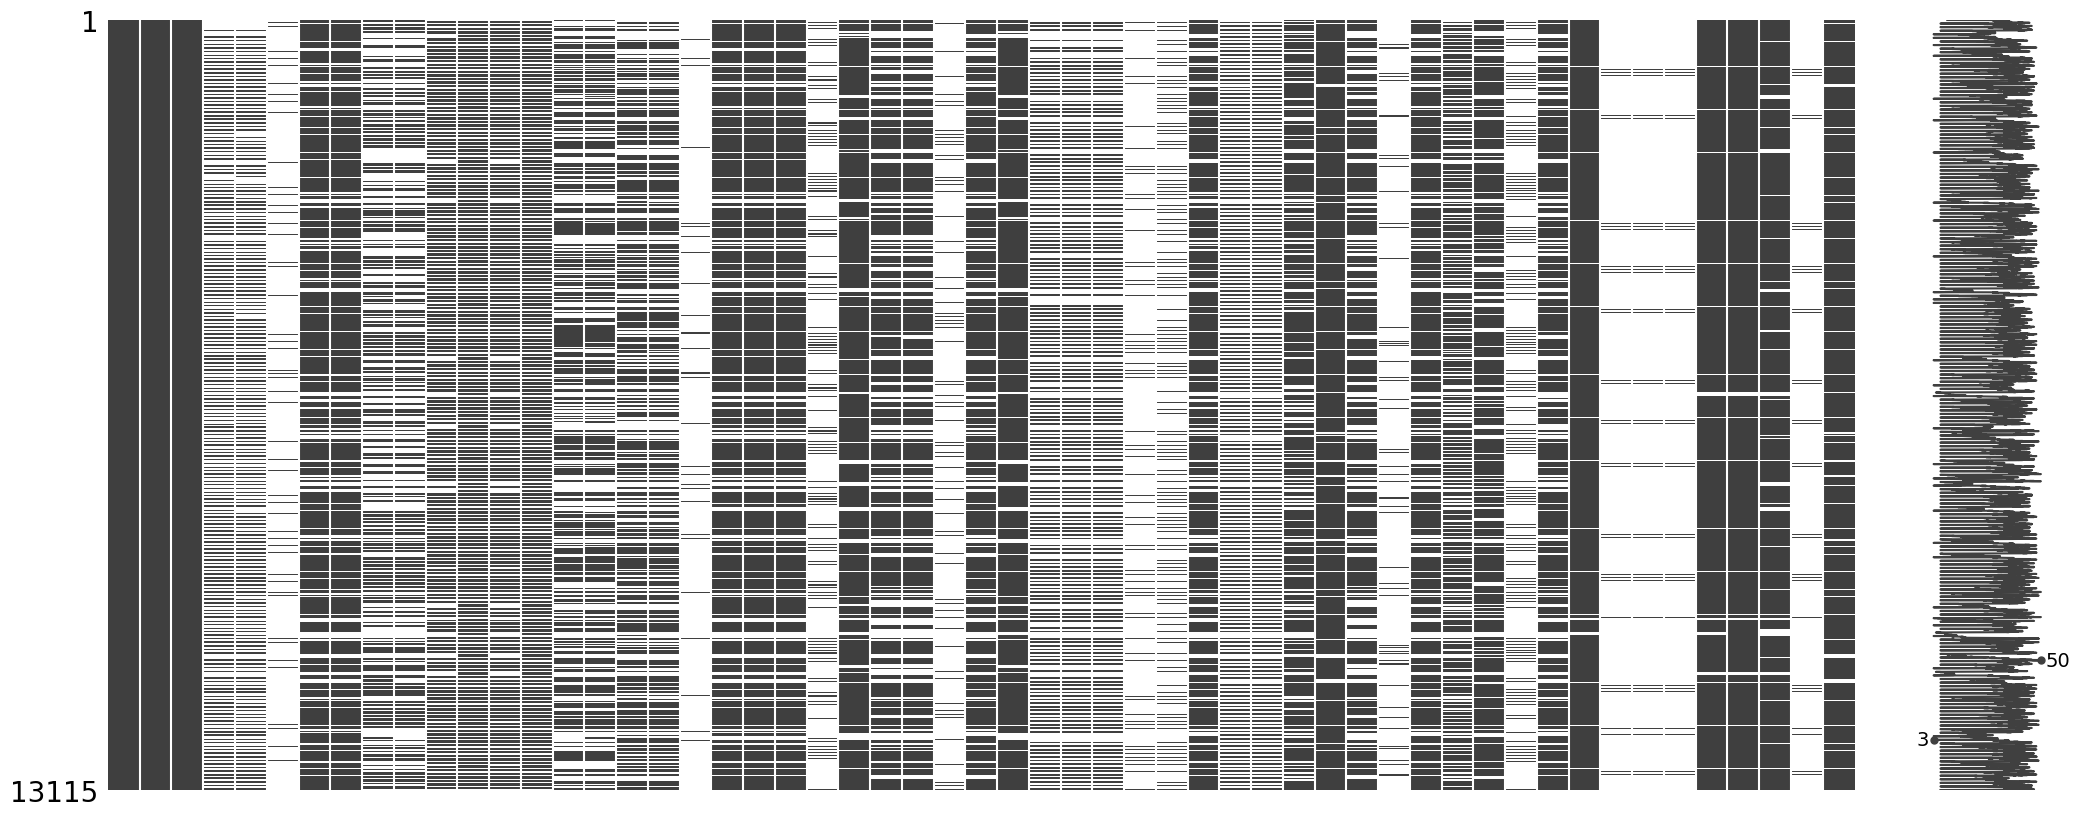

In [82]:
msno.matrix(df)

In [83]:
drop_columns = [6, 19, 23, 27, 33, 34, 41, 45, 48, 49, 50, 54] # hand selected
len(drop_columns)

12

## selecting well represented columns

<AxesSubplot: >

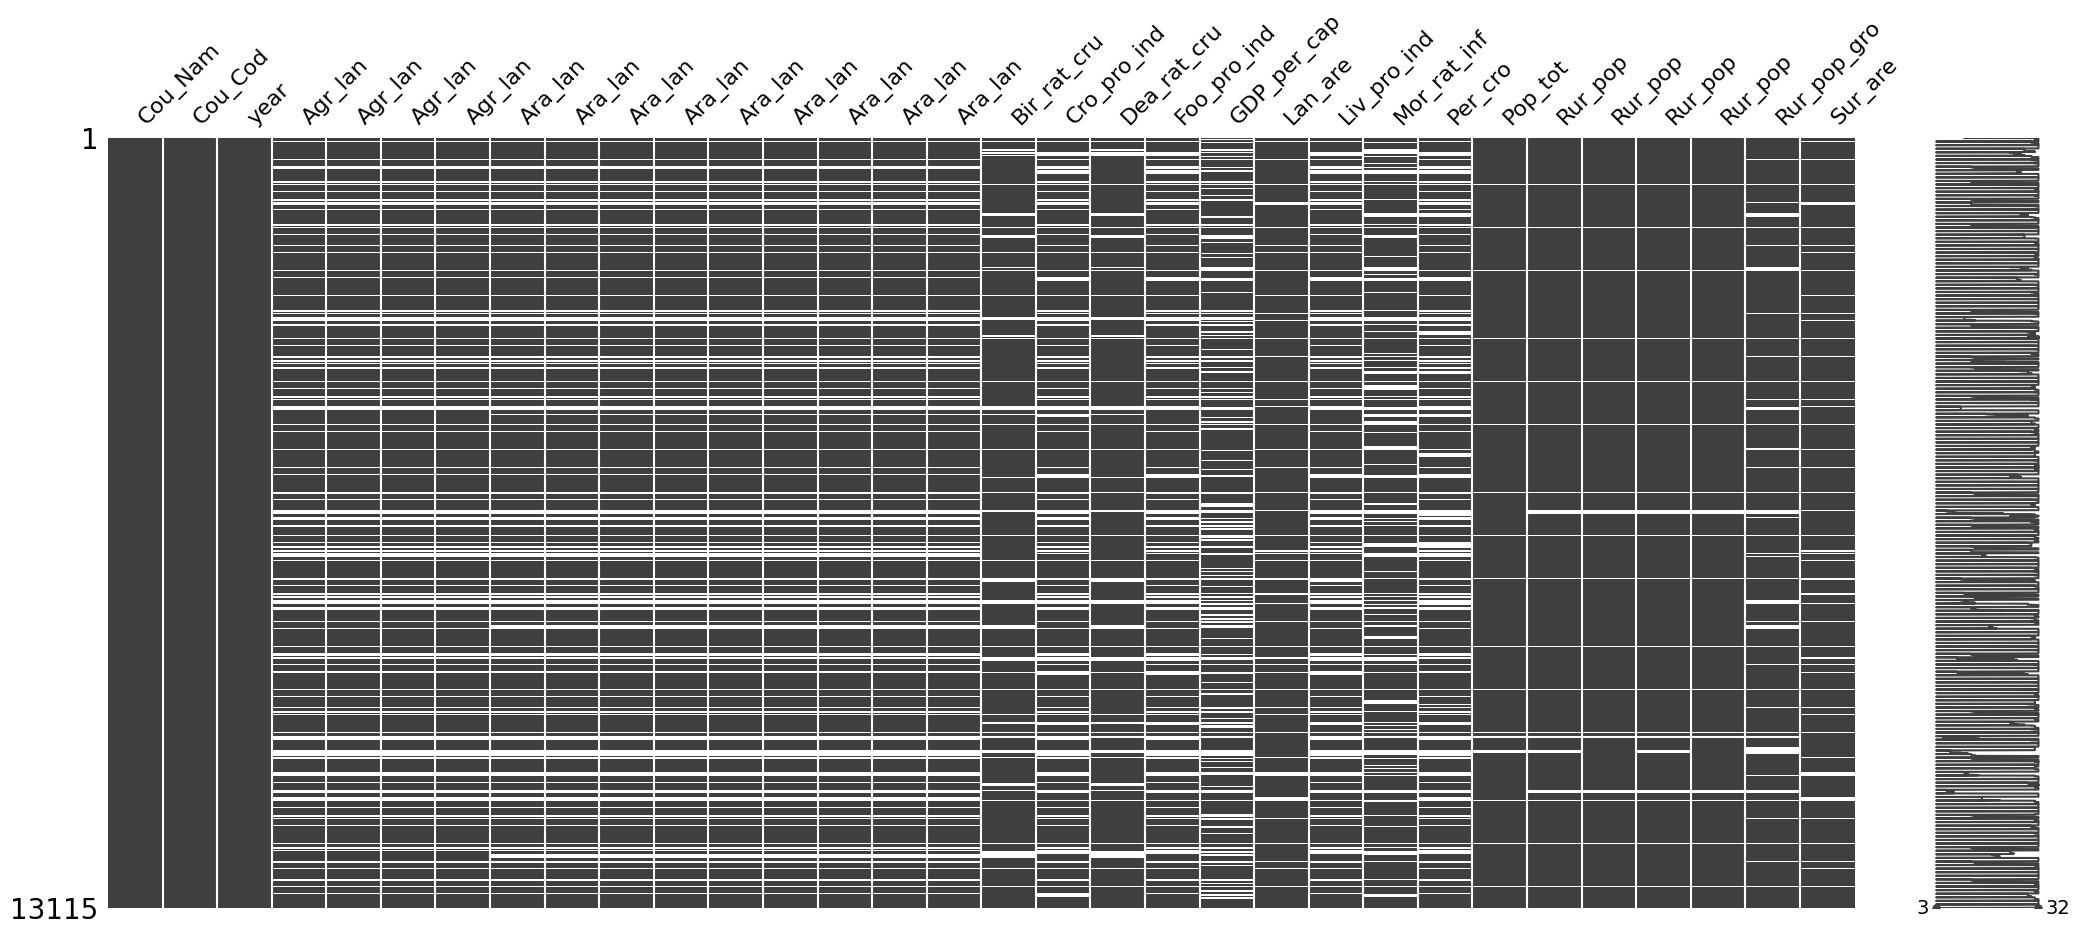

In [97]:
# aggregated - zusammengefasst
# agrar - Landwirtschaft
criteria = df[:].isna().sum() < 13115 * 0.3 # allowed nans
df_selected = df[criteria.index[criteria]]
msno.matrix(df_selected)

In [85]:
df_selected.dtypes

Cou_Nam                     object
Cou_Cod                     object
year                         int64
Agr_lan                    float64
Agr_lan                    float64
Agr_lan                    float64
Agr_lan                    float64
Agr_met_emi                float64
Agr_met_emi                float64
Agr_met_emi                float64
Agr_met_emi                float64
Agr_nit_oxi_emi            float64
Agr_nit_oxi_emi            float64
Agr_nit_oxi_emi            float64
Agr_nit_oxi_emi            float64
Agr_raw_mat_exp            float64
Agr_raw_mat_imp            float64
Agr_for_and_fis_val_add    float64
Agr_for_and_fis_val_add    float64
Agr_for_and_fis_val_add    float64
Agr_for_and_fis_val_add    float64
Ara_lan                    float64
Ara_lan                    float64
Ara_lan                    float64
Ara_lan                    float64
Ara_lan                    float64
Ara_lan                    float64
Ara_lan                    float64
Ara_lan             

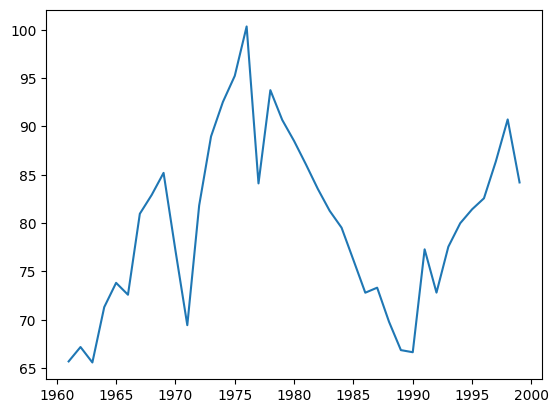

In [98]:
# Agr_lan
n = 40
plt.plot(df_selected.iloc[0:n,2],df_selected.iloc[0:n,17] )

## Visualisation

### no imputation no cleanup

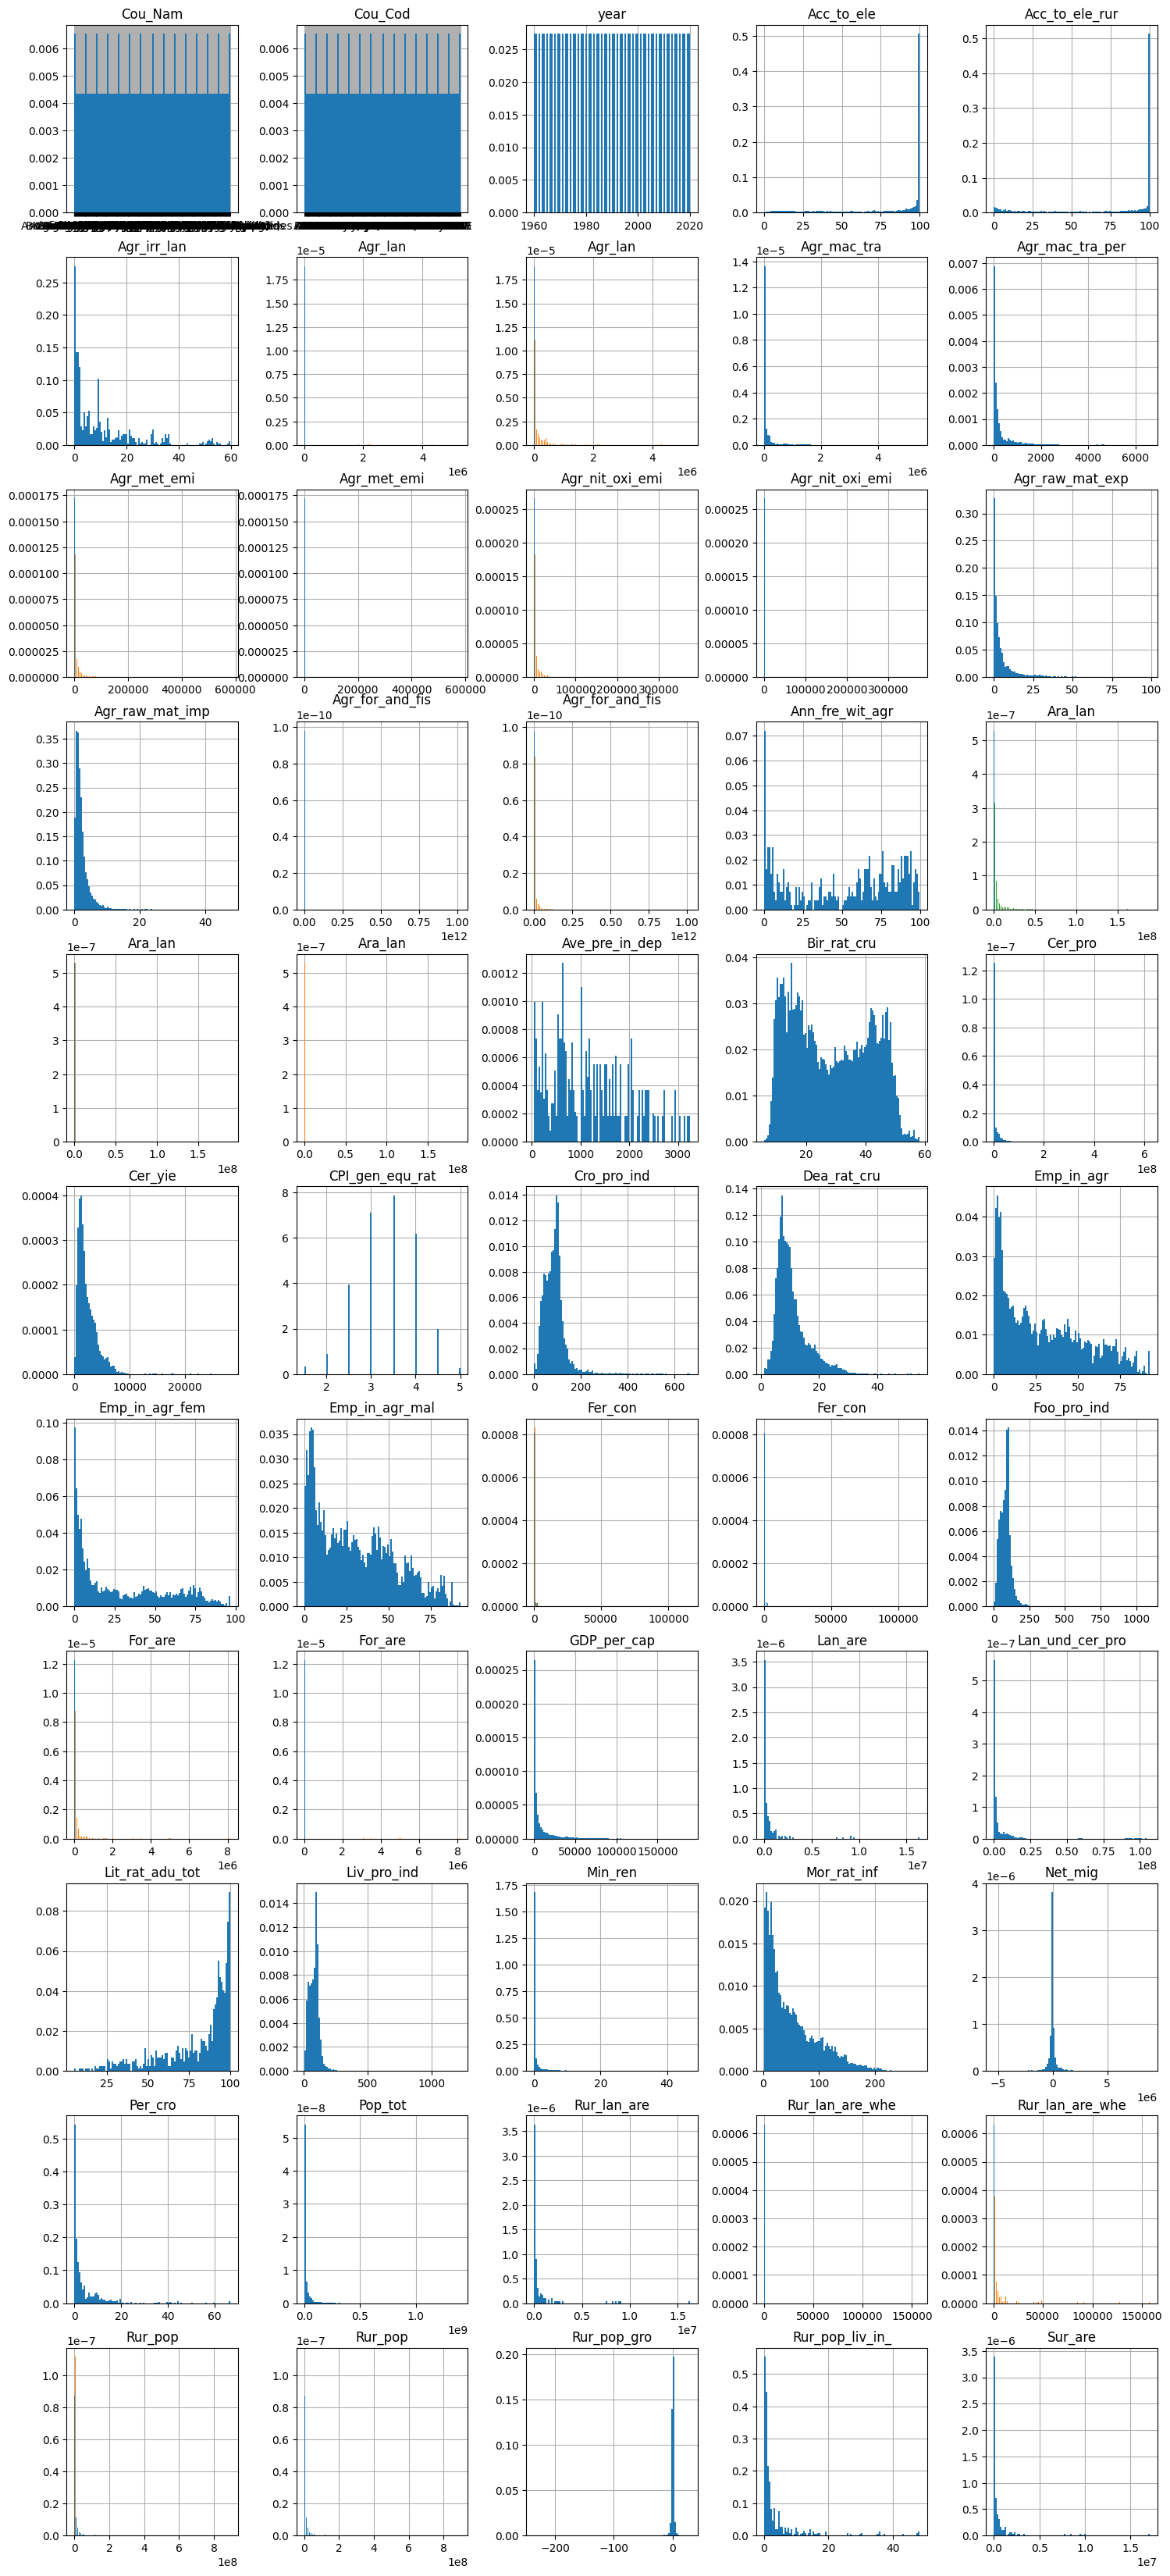

In [81]:
# varable distribution overview
alpha = 0.025

fig, axs = plt.subplots(11,5, figsize=(15,33))
fig.tight_layout(pad=2.0)
# fig.suptitle("distribution overview per feature")
for i, nam in enumerate(df.columns.values):
    ax = axs[i//5, i%5]
    ax.set_title(names[i][0:15])
    # trimmed_data = df[nam]
    # if trimmed_data.dtype == "float64":
    #     # print(nam)
    #     # trimmed_data = df[(df[nam] > df[nam].quantile(alpha)) & (df[nam] < df[nam].quantile(1-alpha))]
    #     pass
    ax.hist(df[nam], bins=100, density=True)
    ax.set_axisbelow(True)
    ax.grid()


/var/folders/3c/t08nl7456zl9jcq07p2xt7x80000gn/T/ipykernel_7236/816694153.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=False)


<AxesSubplot: title={'center': 'Correlation plot'}>

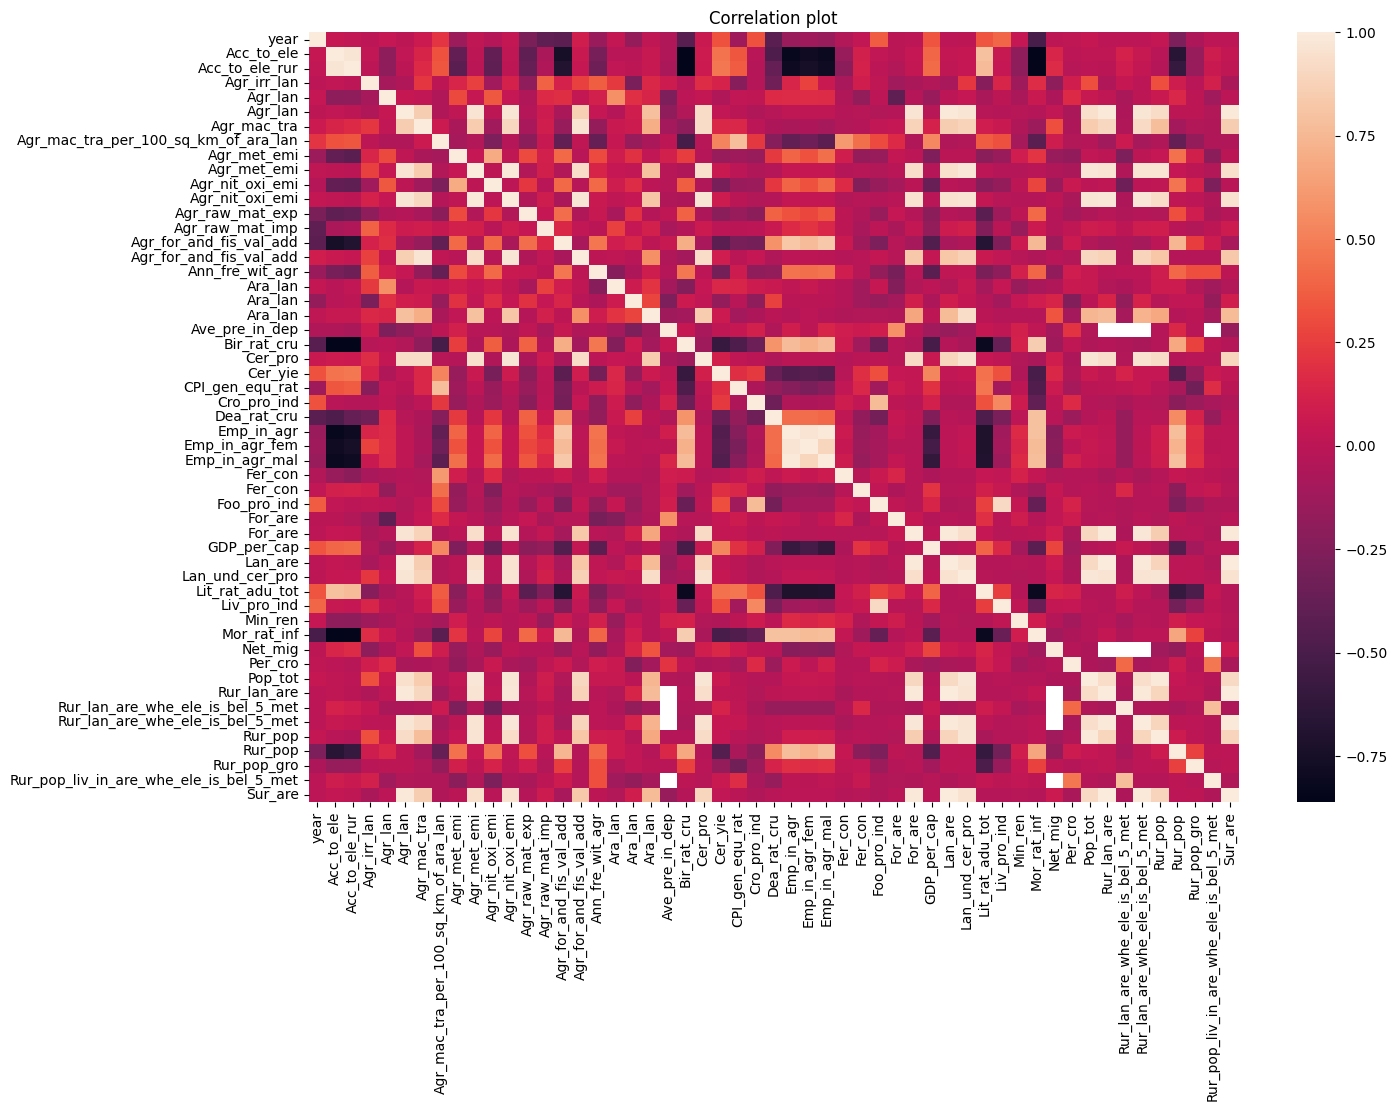

In [20]:
# heatmap - correlation visualisation
df_short = df.copy()
df_short.columns = short_names
plt.figure(figsize=(15,10))
plt.title("Correlation plot")
sns.heatmap(data=df.corr(), annot=False)